In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv(r"C:\Users\hillarik\Desktop\MLzoomcamp\Classification\bank-full.csv", sep=';')


In [16]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [17]:
columns_to_use = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 
    'contact', 'day', 'month', 'duration', 'campaign', 
    'pdays', 'previous', 'poutcome', 'y']
df_selected = df[columns_to_use]

In [18]:
df_selected

age           job   marital  education  balance housing    contact  \
0       58    management   married   tertiary     2143     yes    unknown   
1       44    technician    single  secondary       29     yes    unknown   
2       33  entrepreneur   married  secondary        2     yes    unknown   
3       47   blue-collar   married    unknown     1506     yes    unknown   
4       33       unknown    single    unknown        1      no    unknown   
...    ...           ...       ...        ...      ...     ...        ...   
45206   51    technician   married   tertiary      825      no   cellular   
45207   71       retired  divorced    primary     1729      no   cellular   
45208   72       retired   married  secondary     5715      no   cellular   
45209   57   blue-collar   married  secondary      668      no  telephone   
45210   37  entrepreneur   married  secondary     2971      no   cellular   

       day month  duration  campaign  pdays  previous poutcome    y  
0        5   may       261         1     -1         0  unknown   no  
1        5   may       151         1     -1         0  unknown   no  
2        5   may        76         1     -1         0  unknown   no  
3        5   may        92         1     -1         0  unknown   no  
4        5   may       198         1     -1         0  unknown   no  
...    ...   ...       ...       ...    ...       ...      ...  ...  
45206   17   nov       977         3     -1         0  unknown  yes  
45207   17   nov       456         2     -1         0  unknown  yes  
45208   17   nov      1127         5    184         3  success  yes  
45209   17   nov       508         4     -1         0  unknown   no  
45210   17   nov       361         2    188        11    other   no  

[45211 rows x 15 columns]

SPLIT

In [19]:
from sklearn.model_selection import train_test_split



In [34]:
X_features = df_selected.drop(columns = ["y"])
X_features.head()
y = df_selected["y"]

In [54]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 
            'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'
X = df[features]   # Features (without 'y')
y = df[target] 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
y_train = np.array(df_train["y"])
X_train = df_train.drop(columns = "y")
y_test = df_test["y"]
X_test = df_train.drop(columns = "y")
y_val = df_val["y"]
X_val = df_val.drop(columns = "y")
len(df_train), len(df_val), len(df_test)


(27126, 9042, 9043)

QUESTION 1

In [55]:
from sklearn.metrics import roc_auc_score

# Assuming X_train is the DataFrame with features and y_train is your target
variables = ['balance', 'day', 'duration', 'previous']
highest_auc = 0
best_variable = None

for var in variables:
    auc = roc_auc_score(y_train, X_train[var])  # Use X_train instead of df_train
    if auc < 0.5:
        auc = roc_auc_score(y_train,-X_train[var])  # Invert variable if auc < 0.5
    
    print(f"AUC of {var}: {auc}")
    
    if auc > highest_auc:
        highest_auc = auc
        best_variable = var

print(f"Variable with highest AUC: {best_variable}, AUC: {highest_auc}")


AUC of balance: 0.5888313805382317
AUC of day: 0.525957882383908
AUC of duration: 0.8147002759670778
AUC of previous: 0.5985653242764153
Variable with highest AUC: duration, AUC: 0.8147002759670778


QUESTION 2

In [56]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

X_val = dv.transform(df_val.to_dict(orient='records'))

# Get the predicted probabilities for the positive class
y_pred = model.predict_proba(X_val)[:, 1]

# Compute AUC and round to 3 decimal places
auc = roc_auc_score(y_val, y_pred)
print(f"AUC on validation set: {round(auc, 3)}")



AUC on validation set: 1.0


QUESTION 3

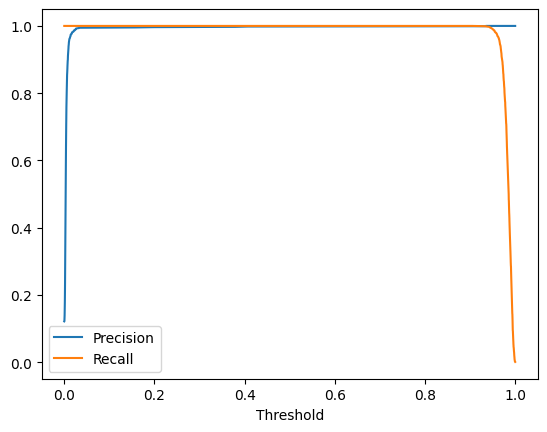

Threshold where precision and recall intersect: 0.933265405355937


In [57]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Binarize the y_val target
lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val).ravel()  # .ravel() to convert it to a 1D array

# Now you can compute the precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val_bin, y_pred)

# Plot precision and recall
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.show()

# If you need to find where precision and recall intersect
intersect_threshold = thresholds[np.argmin(np.abs(precisions - recalls))]
print(f"Threshold where precision and recall intersect: {intersect_threshold}")



QUESTION 4

In [58]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold where F1 score is maximal
max_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[max_f1_index]
print(f"Threshold where F1 is maximal: {best_threshold}")


Threshold where F1 is maximal: 0.9046429861831239


QUESTION 5

In [60]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Assuming 'target' is the name of the target column in your full dataset
X_full_train = df_full_train.drop(columns=['y'])  # Drop the target column from the features
y_full_train = df_full_train['y']  # Extract the target column

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_index, val_index in kf.split(X_full_train):
    # Split the data into training and validation sets
    X_train, X_val = X_full_train.iloc[train_index], X_full_train.iloc[val_index]
    y_train, y_val = y_full_train.iloc[train_index], y_full_train.iloc[val_index]
    
    # One-hot encode the data
    dv = DictVectorizer(sparse=False)
    X_train_enc = dv.fit_transform(X_train.to_dict(orient='records'))
    X_val_enc = dv.transform(X_val.to_dict(orient='records'))
    
    # Train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_enc, y_train)
    
    # Predict and calculate AUC on validation set
    y_pred = model.predict_proba(X_val_enc)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append(auc)

# Output the standard deviation of the scores
print(f"Standard deviation of scores: {np.std(scores)}")



Standard deviation of scores: 0.00469568798756803


QUESTION 6

In [61]:
C_values = [0.000001, 0.001, 1]
results = {}

for C in C_values:
    scores = []
    for train_index, val_index in kf.split(df_full_train):
        X_train, X_val = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
        y_train, y_val = y_full_train.iloc[train_index], y_full_train.iloc[val_index]
        
        # Train logistic regression with different C
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(dv.fit_transform(X_train.to_dict(orient='records')), y_train)
        y_pred = model.predict_proba(dv.transform(X_val.to_dict(orient='records')))[:, 1]
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    results[C] = (mean_score, std_score)

best_C = min(results, key=lambda x: (-results[x][0], results[x][1]))
print(f"Best C value: {best_C}")


Best C value: 1
